In [ ]:
import pandas as pd

date = pd.read_csv("FinancialStatements.csv")
date.head()  # 5 randuri

FileNotFoundError: [Errno 2] No such file or directory: 'FinancialStatements.csv'

In [ ]:
X = date[['Revenue', 'Net Income', 'Share Holder Equity', 'ROE', 'Debt/Equity Ratio']]
X = X.dropna()#sterge randurile incomplete
#profit pozitiv => merita investit
y = X['Net Income'].apply(lambda x: 1 if x > 0 else 0)
X = X.drop(columns=['Net Income'])

NameError: name 'date' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

# imparte datele in seturi de train si test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


NameError: name 'X' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# grila de hiperparametrii
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

#model initial
rf = RandomForestClassifier(random_state=42)
#cautare cu validare incrucisata
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)


grid_search.fit(X_train, y_train)
#cel mai bun model
model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Accuracy on test set:", model.score(X_test, y_test))


NameError: name 'X_train' is not defined

In [ ]:
predictii = model.predict(X_test)

#compara cu ce era corect => ramane ce exista
rezultat = X_test.copy()
rezultat['Invest corect'] = y_test.values
rezultat['Invest prezis de milog'] = predictii
rezultat['Decizie text'] = rezultat['Invest prezis de milog'].apply(lambda x: 'INVESTIM' if x == 1 else 'NU INVESTIM')
# primele 10 predictii
rezultat.head(10)

NameError: name 'model' is not defined

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

y_prob = model.predict_proba(X_test)[:, 1]

# Predictii ca etichete (pentru acuratețe)
y_pred = model.predict(X_test)

# Acuratete
acc = accuracy_score(y_test, y_pred)
print(f"Acuratete: {acc:.4f}")

def binary_cross_entropy(y_true, y_pred, epsilon=1e-15):
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return np.mean(loss)

bce_loss = binary_cross_entropy(y_test.to_numpy(), y_prob)
print(f"Binary Cross Entropy Loss: {bce_loss:.6f}")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

#scoruri de performanta
acc = accuracy_score(y_test, predictii)
precizie = precision_score(y_test, predictii)
recall = recall_score(y_test, predictii)
f1 = f1_score(y_test, predictii)

print(" ANALIZA MODELULUI")
print(f" Acuratete: {acc:.2f}")
print(f" Precizie: {precizie:.2f}")
print(f" Recall: {recall:.2f}")
print(f" F1 Score: {f1:.2f}")

#raport complet
print("\n Classification Report:")
print(classification_report(y_test, predictii, target_names=["Nu Investim", "Investim"]))

NameError: name 'model' is not defined

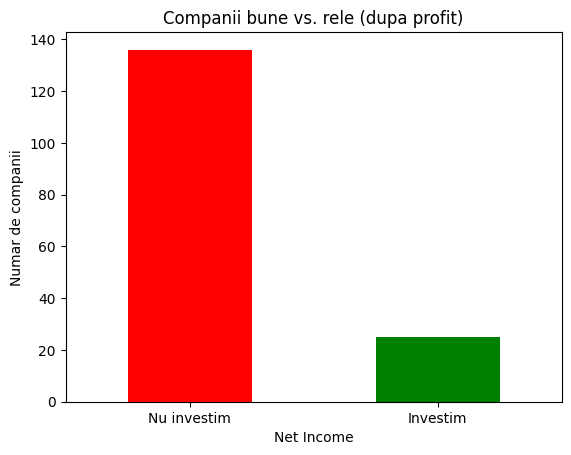

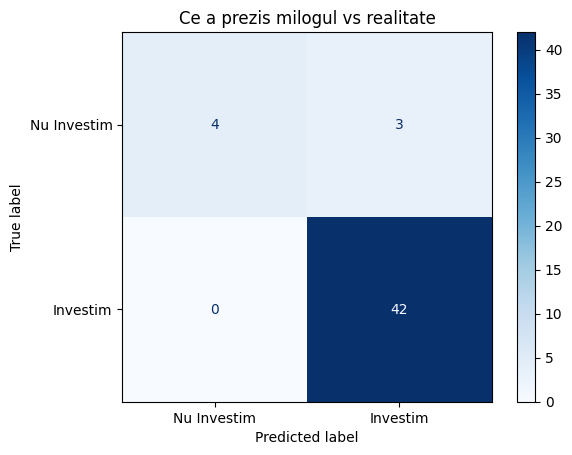

In [ ]:
#companii bune vs rele
import matplotlib.pyplot as plt
# companii bune 1 si rele cu 0
y.value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Companii bune vs. rele (dupa profit)')
plt.xticks([0, 1], ['Nu investim', 'Investim'], rotation=0)
plt.ylabel('Numar de companii')
plt.show()

#milog vs realitate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
mat = confusion_matrix(y_test, predictii)
disp = ConfusionMatrixDisplay(confusion_matrix=mat, display_labels=['Nu Investim', 'Investim'])
disp.plot(cmap='Blues')
plt.title("Ce a prezis milogul vs realitate")
plt.show()


In [ ]:
#calc eroare model pe antrenament si test( bias check)
predictii_train = model.predict(X_train) # predictii pe datele de antrenament

eroare_train = 1 - accuracy_score(y_train, predictii_train)
eroare_test = 1 - accuracy_score(y_test, predictii)

print(" EROARE MODEL")
print(f" Eroare pe antrenament: {eroare_train:.2f}")
print(f" Eroare pe test: {eroare_test:.2f}")

if eroare_test > eroare_train:
    print(" Posibil bias: modelul invata bine pe train, dar greseste mai mult pe test.")
elif eroare_test == eroare_train == 0:
    print(" Modelul prezice perfect – verifica daca datele nu sunt prea simple.")
else:
    print(" Modelul e stabil – eroare mica si constanta.")


 EROARE MODEL
 Eroare pe antrenament: 0.00
 Eroare pe test: 0.06
 Posibil bias: modelul invata bine pe train, dar greseste mai mult pe test.


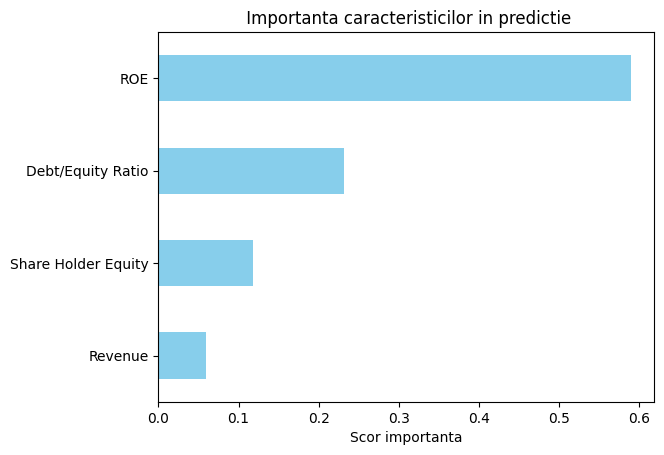

In [ ]:
#  importanta de caracteristici in decizie
import pandas as pd
import matplotlib.pyplot as plt

# Extrageimportante din model
importante = pd.Series(model.feature_importances_, index=X.columns)

# sort + afis
importante.sort_values().plot(kind='barh', color='skyblue')
plt.title(" Importanta caracteristicilor in predictie")
plt.xlabel("Scor importanta")
plt.show()

In [ ]:
!pip install transformers --quiet

from transformers import pipeline

# LLM local pre-antrenat de la HuggingFace
llm = pipeline("text-generation", model="gpt2") #free stuff

# Inceput de promt
prompt = f"""
Answer only in English. Analyze the following company data and answer if it's worth investing.
Give 2-3 reasons and end the answer clearly with one of these lines:
Verdict: YES (worth investing)
or
Verdict: NO (not worth investing)

Company data:
- Revenue: 1000000
- Net Income: 150000
- Equity: 900000
- ROE: 12%
- Debt to Equity Ratio: 0.8
- Current Ratio: 1.6
- Net Profit Margin: 15%
"""

# raspunsul
raspuns = llm(prompt, max_length=200, do_sample=True)[0]['generated_text']
print(" Raspuns LLM local:\n")
print(raspuns)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=200) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


 Raspuns LLM local:


Answer only in English. Analyze the following company data and answer if it's worth investing.
Give 2-3 reasons and end the answer clearly with one of these lines:
Verdict: YES (worth investing)
or
Verdict: NO (not worth investing)

Company data:
- Revenue: 1000000
- Net Income: 150000
- Equity: 900000
- ROE: 12%
- Debt to Equity Ratio: 0.8
- Current Ratio: 1.6
- Net Profit Margin: 15%

Source: http://www.battleship.com/company/employees/crowdfunding/

This post is based on the data used by Battleship.com.

This post is based on the data used by Battleship.com.

More data is available from the following sources:

http://www.battleship.com/data/business/battleship-company/

http://www.funder.com/articles/custom-investment-trends

http://www.investor.com/invest/investors/investor-view?id=1023

http://www.investor.com/investors/investors/investors/investors/investors/investors.html

http://www.bankrate.com/invest/crowdfunding/crowdfunding-results-15

http://www.washi

In [ ]:
!pip install transformers --quiet
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

#FinBERT de la ProsusAI (specializat pe analiza financiara)
finbert_model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")
finbert_tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

#pipeline de analiza
finbert = pipeline("text-classification", model=finbert_model, tokenizer=finbert_tokenizer)
#text(promt ish)
text_finbert = """
Company financials:
Revenue: 1000000
Net Income: 150000
Equity: 900000
ROE: 12%
Debt to Equity Ratio: 0.8
Current Ratio: 1.6
Net Profit Margin: 15%

Evaluate the sentiment from an investor's perspective.
"""

# Aplicam modelul FinBERT
result = finbert(text_finbert)[0]
print("FinBERT sentiment:", result['label'], "| Confidence:", round(result['score'], 2))

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


FinBERT sentiment: neutral | Confidence: 0.94


In [ ]:
# simulare knowledge graph despre companii
knowledge_graph = {
    "Company A": {
        "Fondator": "Alice Smith",
        "Tara": "SUA",
        "Industrie": "Tehnologie",
        "Rating ESG": "A"
    },
    "Company B": {
        "Fondator": "John Doe",
        "Tara": "Germania",
        "Industrie": "Automotive",
        "Rating ESG": "B"
    }
}

# simulare prima companie din rezultat - A
nume_companie = "Company A"
info = knowledge_graph[nume_companie]

print(f" Cunostinte externe despre {nume_companie}:")
for k, v in info.items():
    print(f" {k}: {v}")

if info["Industrie"] == "Tehnologie" and info["Rating ESG"] == "A":
    print("\n Verdict: Industria + rating ESG sunt favorabile — INVESTESTE.")
else:
    print("\n Verdict: Contextul extern nu este foarte favorabil — analizeaza mai atent.")

 Cunostinte externe despre Company A:
 Fondator: Alice Smith
 Tara: SUA
 Industrie: Tehnologie
 Rating ESG: A

 Verdict: Industria + rating ESG sunt favorabile — INVESTESTE.


In [ ]:
from google.colab import files
#openpyxl (pentru .xlsx)
!pip install openpyxl --quiet
# salveaza rezultat in excel
rezultat.to_excel("./decizii_robot.xlsx", index=False)
files.download("./decizii_robot.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>